# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---

In [2]:

import pandas as pd
import sys
import numpy as np
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression

import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 600)



## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

In [33]:
# read in data
flights = pd.read_csv('cs109a_midterm.csv')
flights_2 = flights
flights = pd.get_dummies(flights, prefix = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], columns = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT'], drop_first = True)





## Problem Description

(-25, 25)

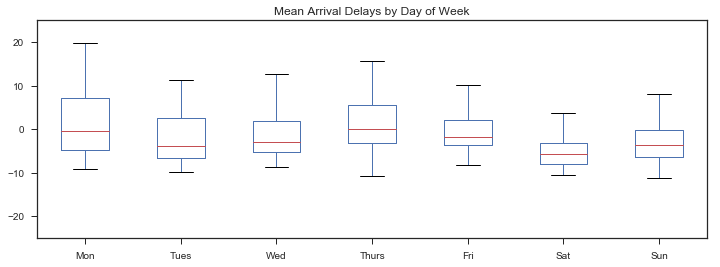

In [34]:
# visualization, EDA I focused a good bit on time, since I believe it might hold the relevent info
fig = plt.figure()

labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat','Sun']
ax = flights_2.pivot_table(index='DATE', columns='DAY_OF_WEEK')['ARRIVAL_DELAY'].plot(kind='box', figsize=[12,4])
ax.set_title("Mean Arrival Delays by Day of Week")
ax.set_ylabel="Delay in Minutes"
ax.set_xlabel="Day of Week"
ax.set_xticklabels(labels)
ax.set_ylim(-25,25)



(-25, 40)

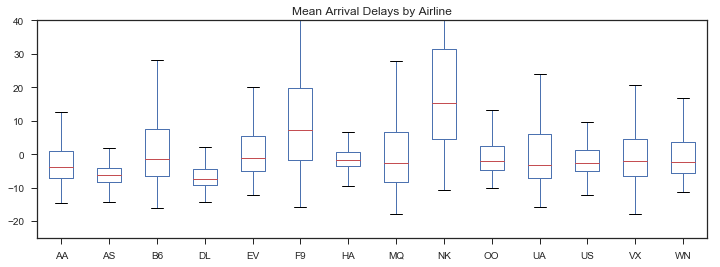

In [35]:
fig = plt.figure()
ax1 = flights_2.pivot_table(index='DATE', columns='AIRLINE', values='ARRIVAL_DELAY').plot(kind='box', figsize=[12,4])
ax1.set_title("Mean Arrival Delays by Airline")
ax1.set_ylabel="Delay in Minutes"
ax1.set_xlabel="Day of Week"
ax1.set_ylim(-25,40)



(-25, 25)

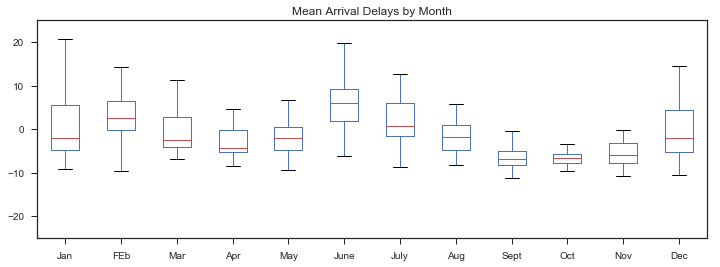

In [36]:
fig = plt.figure()

labels = ['Jan', 'FEb', 'Mar', 'Apr', 'May', 'June','July','Aug','Sept','Oct','Nov', 'Dec']
ax = flights_2.pivot_table(index='DATE', columns='MONTH')['ARRIVAL_DELAY'].plot(kind='box', figsize=[12,4])
ax.set_title("Mean Arrival Delays by Month")
ax.set_ylabel="Delay in Minutes"
ax.set_xlabel="Month"
ax.set_xticklabels(labels)
ax.set_ylim(-25,25)


(-25, 25)

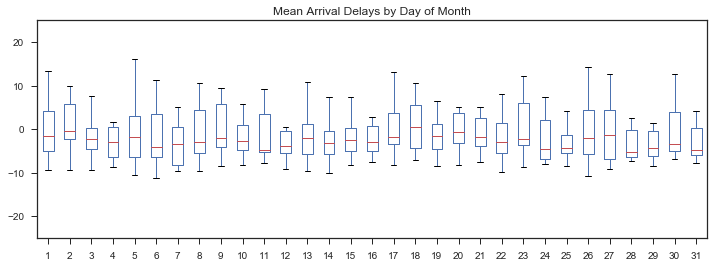

In [37]:
fig = plt.figure()

labels = ['1', '2', '3', '4', '5', '6','7','8','9','10','11', '12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
ax = flights_2.pivot_table(index='DATE', columns='DAY')['ARRIVAL_DELAY'].plot(kind='box', figsize=[12,4])
ax.set_title("Mean Arrival Delays by Day of Month")
ax.set_ylabel="Delay in Minutes"
ax.set_xlabel="Day"
ax.set_xticklabels(labels)
ax.set_ylim(-25,25)

In [38]:
def late (row):
    if row['ARRIVAL_DELAY'] >= 15 :
        return 1
    if row['ARRIVAL_DELAY'] < 15 :
        return 0
    else :
        return 0

# add column
flights['DELAY_OR_NOT'] =  flights.apply(lambda row: late(row), axis=1)

# sample our data and subtract sampled data from full dataset
flights_sample = flights.sample(n=3000, random_state=4)
flights = flights.drop(flights_sample.index)
flights_sample = flights_sample.reset_index(drop=True)


In [39]:
flights_sample_2 = flights_sample

In [40]:
flights.describe()


,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7,DAY_8,DAY_9,DAY_10,DAY_11,DAY_12,DAY_13,DAY_14,DAY_15,DAY_16,DAY_17,DAY_18,DAY_19,DAY_20,DAY_21,DAY_22,DAY_23,DAY_24,DAY_25,DAY_26,DAY_27,DAY_28,DAY_29,DAY_30,DAY_31,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_AIRPORT_10136,ORIGIN_AIRPORT_10140,ORIGIN_AIRPORT_10141,ORIGIN_AIRPORT_10146,ORIGIN_AIRPORT_10154,ORIGIN_AIRPORT_10155,ORIGIN_AIRPORT_10157,ORIGIN_AIRPORT_10158,ORIGIN_AIRPORT_10165,ORIGIN_AIRPORT_10170,ORIGIN_AIRPORT_10185,ORIGIN_AIRPORT_10208,ORIGIN_AIRPORT_10257,ORIGIN_AIRPORT_10268,ORIGIN_AIRPORT_10279,ORIGIN_AIRPORT_10299,ORIGIN_AIRPORT_10333,ORIGIN_AIRPORT_10372,ORIGIN_AIRPORT_10397,ORIGIN_AIRPORT_10408,ORIGIN_AIRPORT_10423,ORIGIN_AIRPORT_10431,ORIGIN_AIRPORT_10434,ORIGIN_AIRPORT_10469,ORIGIN_AIRPORT_10529,ORIGIN_AIRPORT_10551,ORIGIN_AIRPORT_10561,ORIGIN_AIRPORT_10577,ORIGIN_AIRPORT_10581,ORIGIN_AIRPORT_10599,ORIGIN_AIRPORT_10620,ORIGIN_AIRPORT_10627,ORIGIN_AIRPORT_10631,ORIGIN_AIRPORT_10685,ORIGIN_AIRPORT_10693,ORIGIN_AIRPORT_10713,ORIGIN_AIRPORT_10721,ORIGIN_AIRPORT_10728,ORIGIN_AIRPORT_10731,ORIGIN_AIRPORT_10732,ORIGIN_AIRPORT_10739,ORIGIN_AIRPORT_10747,ORIGIN_AIRPORT_10754,ORIGIN_AIRPORT_10779,ORIGIN_AIRPORT_10781,ORIGIN_AIRPORT_10785,ORIGIN_AIRPORT_10792,ORIGIN_AIRPORT_10800,ORIGIN_AIRPORT_10821,ORIGIN_AIRPORT_10849,ORIGIN_AIRPORT_10868,ORIGIN_AIRPORT_10874,ORIGIN_AIRPORT_10918,ORIGIN_AIRPORT_10926,ORIGIN_AIRPORT_10980,ORIGIN_AIRPORT_10990,ORIGIN_AIRPORT_10994,ORIGIN_AIRPORT_11003,ORIGIN_AIRPORT_11013,ORIGIN_AIRPORT_11042,ORIGIN_AIRPORT_11049,ORIGIN_AIRPORT_11057,ORIGIN_AIRPORT_11066,ORIGIN_AIRPORT_11067,ORIGIN_AIRPORT_11076,ORIGIN_AIRPORT_11097,ORIGIN_AIRPORT_11109,ORIGIN_AIRPORT_11111,ORIGIN_AIRPORT_11122,ORIGIN_AIRPORT_11140,ORIGIN_AIRPORT_11146,ORIGIN_AIRPORT_11150,ORIGIN_AIRPORT_11193,ORIGIN_AIRPORT_11203,ORIGIN_AIRPORT_11252,ORIGIN_AIRPORT_11259,ORIGIN_AIRPORT_11267,ORIGIN_AIRPORT_11274,ORIGIN_AIRPORT_11278,ORIGIN_AIRPORT_11292,ORIGIN_AIRPORT_11298,ORIGIN_AIRPORT_11308,ORIGIN_AIRPORT_11315,ORIGIN_AIRPORT_11337,ORIGIN_AIRPORT_11413,ORIGIN_AIRPORT_11423,ORIGIN_AIRPORT_11433,ORIGIN_AIRPORT_11447,ORIGIN_AIRPORT_11471,ORIGIN_AIRPORT_11481,ORIGIN_AIRPORT_11503,ORIGIN_AIRPORT_11525,ORIGIN_AIRPORT_11537,ORIGIN_AIRPORT_11540,ORIGIN_AIRPORT_11577,ORIGIN_AIRPORT_11587,ORIGIN_AIRPORT_11603,ORIGIN_AIRPORT_11612,ORIGIN_AIRPORT_11617,ORIGIN_AIRPORT_11618,ORIGIN_AIRPORT_11624,ORIGIN_AIRPORT_11630,ORIGIN_AIRPORT_11637,ORIGIN_AIRPORT_11638,ORIGIN_AIRPORT_11641,ORIGIN_AIRPORT_11648,ORIGIN_AIRPORT_11695,ORIGIN_AIRPORT_11697,ORIGIN_AIRPORT_11721,ORIGIN_AIRPORT_11775,ORIGIN_AIRPORT_11778,ORIGIN_AIRPORT_11823,ORIGIN_AIRPORT_11865,ORIGIN_AIRPORT_11867,ORIGIN_AIRPORT_11884,ORIGIN_AIRPORT_11898,ORIGIN_AIRPORT_11905,ORIGIN_AIRPORT_11921,ORIGIN_AIRPORT_11953,ORIGIN_AIRPORT_11973,ORIGIN_AIRPORT_11977,ORIGIN_AIRPORT_11980,ORIGIN_AIRPORT_11982,ORIGIN_AIRPORT_11986,ORIGIN_AIRPORT_11995,ORIGIN_AIRPORT_11996,ORIGIN_AIRPORT_12003,ORIGIN_AIRPORT_12007,ORIGIN_AIRPORT_12016,ORIGIN_AIRPORT_12094,ORIGIN_AIRPORT_12129,ORIGIN_AIRPORT_12156,ORIGIN_AIRPORT_12173,ORIGIN_AIRPORT_12177,ORIGIN_AIRPORT_12191,ORIGIN_AIRPORT_12197,ORIGIN_AIRPORT_12206,ORIGIN_AIRPORT_12217,ORIGIN_AIRPORT_12255,ORIGIN_AIRPORT_12264,ORIGIN_AIRPORT_12265,ORIGIN_AIRPORT_12266,ORIGIN_AIRPORT_12278,ORIGIN_AIRPORT_12280,ORIGIN_AIRPORT_12323,ORIGIN_AIRPORT_12335,ORIGIN_AIRPORT_12339,ORIGIN_AIRPORT_12343,ORIGIN_AIRPORT_12389,ORIGIN_AIRPORT_12391,ORIGIN_AIRPORT_12402,ORIGIN_AIRPORT_12441,ORIGIN_AIRPORT_12448,ORIGIN_AIRPORT_12451,ORIGIN_AIRPORT_12478,ORIGIN_AIRPORT_12511,ORIGIN_AIRPORT_12519,ORIGIN_AIRPORT_12523,ORIGIN_AIRPORT_12758,ORIGIN_AIRPORT_12819,ORIGIN_AIRPORT_12884,ORIGIN_AIRPORT_12888,ORIGIN_AIRPORT_12889,ORIGIN_AIRPORT_12891,ORIGIN_AIRPORT_12

In [41]:
# turn time data into integers 1-24
#def time(row):
#    return int(row['SCHED_DEP'][:2])
#
#flights_sample['SCHED_DEP'] =  flights_sample.apply(lambda row: time(row), axis=1)   
#flights['SCHED_DEP'] =  flights.apply(lambda row: time(row), axis=1) 

In [42]:
#def time_two(row):
#    return int(row['SCHED_ARR'][:2])
#
#flights_sample['SCHED_ARR'] =  flights_sample.apply(lambda row: time_two(row), axis=1)
#flights['SCHED_ARR'] =  flights.apply(lambda row: time_two(row), axis=1)

In [43]:
flights_sample_2 = flights_sample
flights_2 = flights


In [44]:
# drop unecessary columns and seperate X and y
#y = ((np.array(flights_sample['DELAY_OR_NOT'])))
y = flights_sample['DELAY_OR_NOT'].values
flights_sample = flights_sample.drop(['ARRIVAL_DELAY','DATE','AIRLINE','SCHED_DEP','SCHED_ARR','FLIGHT_NUMBER','TAIL_NUMBER','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)

X = flights_sample.loc[:].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

# drop unecessary columns and seperate X and y on full dataset
#y = ((np.array(flights_sample['DELAY_OR_NOT'])))
y_full = flights['DELAY_OR_NOT'].values
flights = flights.drop(['ARRIVAL_DELAY','DATE','AIRLINE','SCHED_DEP','SCHED_ARR','FLIGHT_NUMBER','TAIL_NUMBER','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)

X_full = flights.loc[:].values

# split into train and test
#X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.33, random_state=4)

In [45]:
# check shape of data
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(2010, 1305) (2010, 1) (990, 1305) (990, 1)


In [46]:
# check shape of data of full dataset

y_full = y_full.reshape(len(y_full), 1)
print(np.shape(X_full), np.shape(y_full))

(801941, 1305) (801941, 1)


In [47]:
#check missingness
np.any(np.isnan(flights_sample))

False

In [48]:
#check missingness
np.all(np.isfinite(flights_sample))

True

In [20]:
#missingness summary
missing = flights.isnull().sum(axis=0).reset_index()
missing.columns = ['variable', 'missing values']
missing['percent_missing']=100-((flights.shape[0]-missing['missing values'])/flights.shape[0]*100)
missing.sort_values('percent_missing').reset_index(drop = True)

,variable,missing values,percent_missing
0,DEPARTURE_DELAY,0,0.0
1,DESTINATION_AIRPORT_13367,0,0.0
2,DESTINATION_AIRPORT_13360,0,0.0
3,DESTINATION_AIRPORT_13344,0,0.0
4,DESTINATION_AIRPORT_13342,0,0.0
5,DESTINATION_AIRPORT_13303,0,0.0
6,DESTINATION_AIRPORT_13296,0,0.0
7,DESTINATION_AIRPORT_13290,0,0.0
8,DESTINATION_AIRPORT_13377,0,0.0
9,DESTINATION_AIRPORT_13277,0,0.0


In [21]:
'''
# step forward model selection
# gets the score of a given model, creates dict entry of model with its bic
def get_score(predictors):
    model = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,cv=5
        ,n_jobs=-1
        ,random_state=777
        ,fit_intercept=True
        ,solver='newton-cg',)
    model.fit(X_train[list(predictors)],y_train)
    return {"model": model, "score" : model.score(X_train, y_train)}

# determine the best of a given set of models
def best_of(predictors):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(get_score(predictors+[p]))
    models = pd.DataFrame(results)
    best_model = models.loc[models['score'].argmax()]
    return best_model

models = pd.DataFrame(columns=["score", "model"])
predictors = []

# go through predictors stepwise until adding more predictors raises bic
for i in range(1, 651):
    models.loc[i] = best_of(predictors) 
    predictors = models.loc[i]["model"].model.exog_names
    if i == 1:
        best_score = models.loc[i]["score"]        
    else:
        if models.loc[i]["score"] < best_score:
            best_score = models.loc[i]["score"]        
        if models.loc[i]["score"] > best_score:
            best_model = models.loc[i-1]
            print(best_model)
            break
'''

'\n# step forward model selection\n# gets the score of a given model, creates dict entry of model with its bic\ndef get_score(predictors):\n    model = LogisticRegressionCV(\n        Cs=list(np.power(10.0, np.arange(-10, 10)))\n        ,penalty=\'l2\'\n        ,cv=5\n        ,n_jobs=-1\n        ,random_state=777\n        ,fit_intercept=True\n        ,solver=\'newton-cg\',)\n    model.fit(X_train[list(predictors)],y_train)\n    return {"model": model, "score" : model.score(X_train, y_train)}\n\n# determine the best of a given set of models\ndef best_of(predictors):\n    remaining_predictors = [p for p in X_train.columns if p not in predictors]\n    results = []\n    for p in remaining_predictors:\n        results.append(get_score(predictors+[p]))\n    models = pd.DataFrame(results)\n    best_model = models.loc[models[\'score\'].argmax()]\n    return best_model\n\nmodels = pd.DataFrame(columns=["score", "model"])\npredictors = []\n\n# go through predictors stepwise until adding more pred

In [49]:
# Fit a logistic regression classifier with LASSO to the training set and report the accuracy of the classifier on the test set
clf = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l1'
        ,cv=5
        ,n_jobs=-1
        ,random_state=777
        ,fit_intercept=True
        ,solver='liblinear')
clf = clf.fit(X_train, y_train)


# Lasso Regularization parameter
print('\n')
print("The optimized L2 regularization paramater id:", clf.C_)

# The coefficients
print('Estimated beta1: \n', clf.coef_)
print('Estimated beta0: \n', clf.intercept_)

# Metrics
print('\n')
print('Test Set Confusion matrix:') 
print(confusion_matrix(y_test, clf.predict(X_test)))
full_score = clf.score(X_full, y_full)    
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_prediction = clf.predict(X_test)
test_precision = precision_score(y_test, y_prediction)
print('The training classification accuracy is: ', train_score)
print('The testing classification accuracy is: ', test_score)
print('The precision score on the test set is: ', test_precision)

print('The score on the full dataset is :', full_score )

C:\Users\wlt42\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




The optimized L2 regularization paramater id: [ 1.]
Estimated beta1: 
 [[  1.90520182e-01   8.17049374e-03  -2.37264328e-01 ...,   0.00000000e+00
    0.00000000e+00   9.13364944e+00]]
Estimated beta0: 
 [-3.63728165]


Test Set Confusion matrix:
[[875   0]
 [  0 115]]
The training classification accuracy is:  1.0
The testing classification accuracy is:  1.0
The precision score on the test set is:  1.0
The score on the full dataset is : 0.999859091878


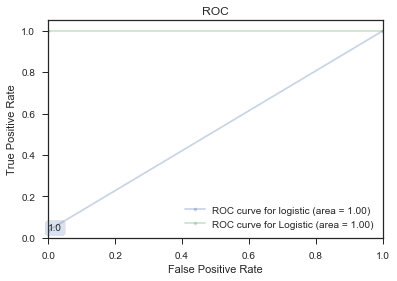

In [51]:
# from Lab, making ROC curves for this model, added ROC curve for our all negative model
#manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred


from sklearn.metrics import roc_curve, auc

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:    
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    fpr_0, tpr_0, thresholds_1 = metrics.roc_curve(y_test, t_repredict(clf, 0.5, X_test))
    roc_auc_0 = auc(fpr_0, tpr_0)
    plt.plot(fpr_0, tpr_0, '.-', alpha=0.3, label='ROC curve for Logistic (area = %0.2f)' % (roc_auc_0))
    ax.legend(loc="lower right")
    return ax

ax=make_roc("logistic",clf, y_test, X_test, labe=100, skip=2)

In [24]:
# QDA classification

clf = QuadraticDiscriminantAnalysis(store_covariances=True)
clf.fit(X_train, y_train.flatten(y_train.tolist()))

print ('The classifier had a Train score of:', clf.score(X_train,y_train))
print ('The classifier had a Test score of:', clf.score(X_test,y_test))
print('The confusion matrix is:')
print(confusion_matrix(y_test,clf.predict(X_test)))
#full_score = clf.score(X_full, y_full)  
#print('The score on the full dataset is :', full_score )


C:\Users\wlt42\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  after removing the cwd from sys.path.
C:\Users\wlt42\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


The classifier had a Train score of: 0.995024875622
The classifier had a Test score of: 0.883838383838
The confusion matrix is:
[[791  84]
 [ 31  84]]


In [52]:
# decision tree
from sklearn import tree
parameters = {'max_depth':range(2,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5, n_jobs=4)
clf.fit(X_train, y_train.flatten(y_train.tolist()))
tree_model = clf.best_estimator_
print ('The classifier had the best CrossValidated score of:', clf.best_score_)
print('at a depth of:', clf.best_params_)
print ('The classifier had a Train score of:', tree_model.score(X_train,y_train))
print ('The classifier had a Test score of:', tree_model.score(X_test,y_test))
print('The confusion matrix is:')
print(confusion_matrix(y_test,tree_model.predict(X_test)))
full_score = clf.score(X_full, y_full)  
print('The score on the full dataset is :', full_score )
print('The Confusion matrix on the full dataset:')
print(confusion_matrix(y_full,tree_model.predict(X_full)))



C:\Users\wlt42\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """


The classifier had the best CrossValidated score of: 1.0
at a depth of: {'max_depth': 2}
The classifier had a Train score of: 1.0
The classifier had a Test score of: 1.0
The confusion matrix is:
[[875   0]
 [  0 115]]
The score on the full dataset is : 1.0
The Confusion matrix on the full dataset:
[[720168      0]
 [     0  81773]]


ValueError: could not convert string to float: 'OO'

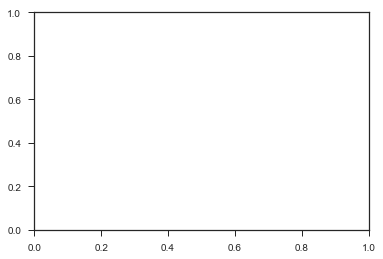

In [53]:
plt.plot(flights_sample_2.AIRLINE[:990], tree_model.predict(X_test), color="blue", label='Predicted Delays by AIRLINE')
#plt.plot(k_list, rtest_list, color="red", label='test R^2')
plt.xlabel('AIRLINE')
plt.ylabel('DELAYS')
plt.title('Predicted Delays by AIRLINE')
plt.axis('tight')
plt.legend(loc='best')

plt.show()

C:\Users\wlt42\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


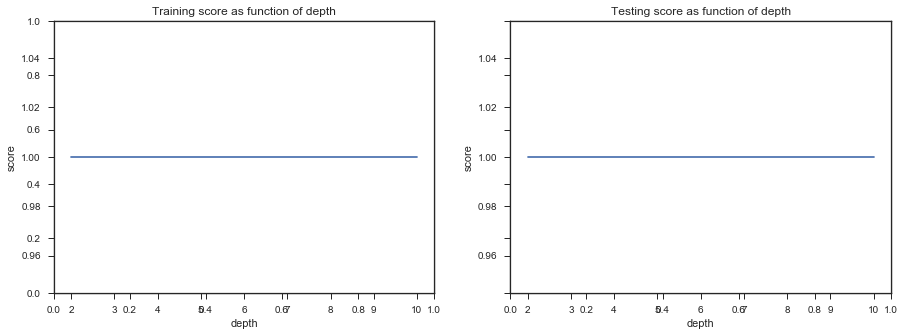

In [27]:
# decision tree depth visualization
depths = [2,3,4,5,6,7,8,9,10]
fig, ax= plt.subplots(1, 2, figsize=(15, 5), sharey=True)
scores_train = []
scores_test = []
for depth in depths:
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    scores_train.append(dt.score(X_train, y_train))
ax5 = fig.add_subplot(121)
ax6 = fig.add_subplot(122)    
ax5.set_xlabel('depth')
ax5.set_ylabel('score')
ax5.set_title('Training score as function of depth')
ax5.legend()
ax5.plot(depths, scores_train)

for depth in depths:
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    scores_test.append(dt.score(X_test, y_test))
    
ax6.set_xlabel('depth')
ax6.set_ylabel('score')
ax6.set_title('Testing score as function of depth')
ax6.legend()
ax6.plot(depths, scores_test)



In [ ]:
flights.describe()

In [28]:
# drop unecessary columns and seperate X and y
#y = ((np.array(flights_sample['DELAY_OR_NOT'])))
y_full = flights_2['ARRIVAL_DELAY'].values
y = flights_sample_2['ARRIVAL_DELAY'].values
flights_sample_2 = flights_sample_2.drop(['ARRIVAL_DELAY','DATE','AIRLINE','SCHED_DEP','SCHED_ARR','FLIGHT_NUMBER','TAIL_NUMBER','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','DELAY_OR_NOT'], axis=1)
flights_2 = flights_2.drop(['ARRIVAL_DELAY','DATE','AIRLINE','SCHED_DEP','SCHED_ARR','FLIGHT_NUMBER','TAIL_NUMBER','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','DELAY_OR_NOT'], axis=1)
X = flights_sample_2.loc[:].values
X_full = flights_2.loc[:].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)



In [29]:
# check shape of data
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(2010, 1304) (2010, 1) (990, 1304) (990, 1)


In [30]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=4)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print('The equation of the regression plane is: {} + {}^T . x'.format(lasso.intercept_, lasso.coef_))
train_MSE= np.mean((y_train - lasso.predict(X_train))**2)
test_MSE= np.mean((y_test - lasso.predict(X_test))**2)

print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = lasso.score(X_train, y_train)
test_R_sq = lasso.score(X_test, y_test)
test_R_sq_full = lasso.score(X_full, y_full)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))
print('The R2 on full dataset:', test_R_sq_full )

C:\Users\wlt42\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The equation of the regression plane is: -0.17742450437283325 + [  9.98922036e-01  -4.94188541e-04  -9.82338633e-01 ...,  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00]^T . x
The train MSE is 2118.190601238928, the test MSE is 1876.3183037572326
The train R^2 is 0.9999711219063213, the test R^2 is 0.9999629104122523
The R2 on full dataset: 0.999964460173


We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.



In [ ]:
# statsmodel regression
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
# build the OLS model from the training data
smm = sm.OLS(y_train, X)

#save regression info in results_sm
results_sm = smm.fit()

print(results_sm)
print(results_sm.summary())
print('Parameters: ', results_sm.params)





### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

I first created a sample of n=3000 to explore the data. I additionally kept the full dataset and made the same changes on it as the sample set. I removed the following predictors: 'ARRIVAL_DELAY','DATE','AIRLINE','SCHED_DEP','SCHED_ARR','FLIGHT_NUMBER','TAIL_NUMBER','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'.
Date duplicates information already accounted for by monthe, day, and day of the wek. Tail number and flight number are nomianal and contribute nothing to our model. All of the DELAYS were removed as well, as these just indicate a reason for a delay. Additionally the data in these columns was missing upwards of 90% of the values. I removed SCHED_ARR and SCHED_DEP after onehot encoding each hour of the day. This made my model unnecessarily complex, so I abandoned this line after of reasoning after seeing scores for some other models. 
I removed AIRLIN under the assumption that much of commercial airport traffic is highly regulated and thus delays may result more from airport conditions rather than any particular airline. Also, my graph showed not an unreasonable difference in mean delays. I realize this may be a faulty assumption, but the models performance eased this worry. Although perhaps relevent to a flights ontime status, the other predictors clearly made up for this. I implemented a cross validated decision tree,  tuning for depth, a QDA, and a cross validated Lasso Logistic Regression, tuning for alpha. 

The best results came from the decision tree with:
The classifier had the best CrossValidated score of: 1.0
at a depth of: {'max_depth': 2}
The classifier had a Train score of: 1.0
The classifier had a Test score of: 1.0
The confusion matrix is:
[[875   0]
 [  0 115]]
The score on the full dataset is : 1.0
The Confusion matrix on the full dataset:
[[722834      0]
 [     0  82107]]
 
 I saw no need to fit an ROC curve, as the classifier made no errors on the full dataset. Also, the cost of a false negative and a false postive seem equivelant. This model beat logistic regression by a fraction of a percent. Having had these results on the entire dataset, I was happy with the results. Though the models is complext with high dimensionality, its performance is superb, and the runtime was minimal.
 
For the regression, I performed an OLS regression, so that I could see p values easily. This with the notion to remove excess predictors. At the same time, I fit a cross validated Lasso linear regression, tuning for alpha. The results again were impressive: 
The train R^2 is 0.9999711219063213, the test R^2 is 0.9999629104122523
The R2 on full dataset: 0.999964478576

As far as inference, the 6th through the 51st predictors had the biggets impact. This range is the onehot encodings of month, day and day oth the week. Othe predictors certainly had an impact, especially certain arrival airports, but the date and time had the biggest impact.

Additional things I could have done. Fully implemented stepwise predictor selection. The models seems like they could get much simpler, yet there performance was near perfect or perfect.

